In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

# Data Cleaning

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df = df.drop(['availability','society'],axis=1)

In [6]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
from matplotlib import pyplot as plt

<Axes: >

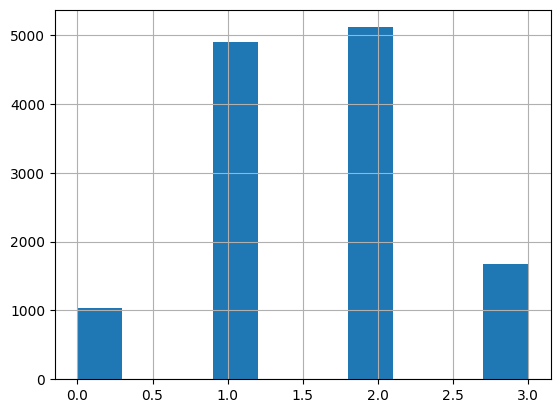

In [9]:
df['balcony'].hist()

In [10]:
df['balcony'] =df['balcony'].fillna(df['balcony'].median())

In [11]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [13]:
df.shape

(13320, 7)

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]) if isinstance (x,str) else None)

In [16]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [17]:
df['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [18]:
df[df.bhk>15]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27.0
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19.0
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16.0
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43.0
11559,Plot Area,1Kasavanhalli,18 Bedroom,1200,18.0,2.0,200.0,18.0


In [19]:
df = df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try :
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4.0
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2.0
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2.0
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2.0
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2.0
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3.0
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2.0
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2.0


In [23]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
convert('2100 - 2850')

2475.0

In [25]:
df1 = df.copy()

In [26]:
df1['total_sqft'] = df1['total_sqft'].apply(convert)

In [27]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0


In [28]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df1.isna().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [30]:
df1.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [31]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [32]:
df2 = df1.dropna()

In [33]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

# Feature_eng

In [34]:
df3 = df2.copy()

In [35]:
df3['price_per_sq'] = df3['price']*100000/df3['total_sqft']

In [36]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [37]:
df3['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [38]:
len(df3['area_type'].unique())

4

In [41]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [42]:
len(df3['location'].unique())

1298

In [43]:
df3.location = df3.location.apply(lambda x: x.strip())

In [44]:
new_location = df3.groupby('location')['location'].agg('count')
new_location

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [46]:
new_location.sort_values(ascending=False)  

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [47]:
len(new_location[new_location<=10])

1047

In [50]:
loc = new_location[new_location<=10]
loc

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1047, dtype: int64

In [52]:
df3.location = df3.location.apply(lambda x: 'other' if x in loc else x)

In [54]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [55]:
len(df3['location'].unique())

241

In [57]:
df3.head(20)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.0,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4.0,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3.0,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.00,6.0,36274.509804


In [59]:
df3.tail()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,5.0,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,2.0,400.0,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.0,2.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.0,4.0,10407.336319
13319,Super built-up Area,Doddathoguru,1 BHK,550.0,1.0,1.0,17.0,1.0,3090.909091


# Outliers Removing

In [60]:
df3.shape

(13200, 9)

In [63]:
df3[df3.total_sqft/df3.bhk<=300]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6.0,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8.0,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...,...,...
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5.0,9090.909091
13300,Plot Area,Hosakerehalli,5 Bedroom,1500.0,6.0,2.0,145.0,5.0,9666.666667
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5.0,9043.927649
13306,Plot Area,other,4 Bedroom,1200.0,5.0,2.0,325.0,4.0,27083.333333


In [64]:
df4 = df3[~(df3.total_sqft/df3.bhk<=300)]

In [65]:
df4.shape

(12274, 9)

In [67]:
df4.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sq
count,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000
mean,1596.684515,2.545462,1.604367,110.622472,2.631335,6211.880230
std,1267.981848,1.067552,0.796943,152.925281,0.963642,4053.214807
min,340.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,1.000000,49.000000,2.000000,4200.000000
50%,1304.000000,2.000000,2.000000,69.180000,3.000000,5263.157895
75%,1702.000000,3.000000,2.000000,115.000000,3.000000,6825.474875
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [68]:
def outliers_price_per_sq(df):
    df_final = pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sq)
        std = np.std(sub_df.price_per_sq)
        reduce_df = sub_df[(sub_df.price_per_sq>(m-std)) & (sub_df.price_per_sq<=(m+std))]
        df_final = pd.concat([df_final,reduce_df],ignore_index=True)
    return df_final

df5 = outliers_price_per_sq(df4)


In [69]:
df5.shape

(10018, 9)

In [70]:
import matplotlib 

In [74]:
def scatter_plot(df,location):
    bhk_2 =df[(df.location == location) &(df.bhk==2)]
    bhk_3 =df[(df.location == location) &(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (12,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='brown',label='2_BHK',s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,marker='*',color='green',label='3_BHK',s=50)
    plt.xlabel("Total square_foot")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()



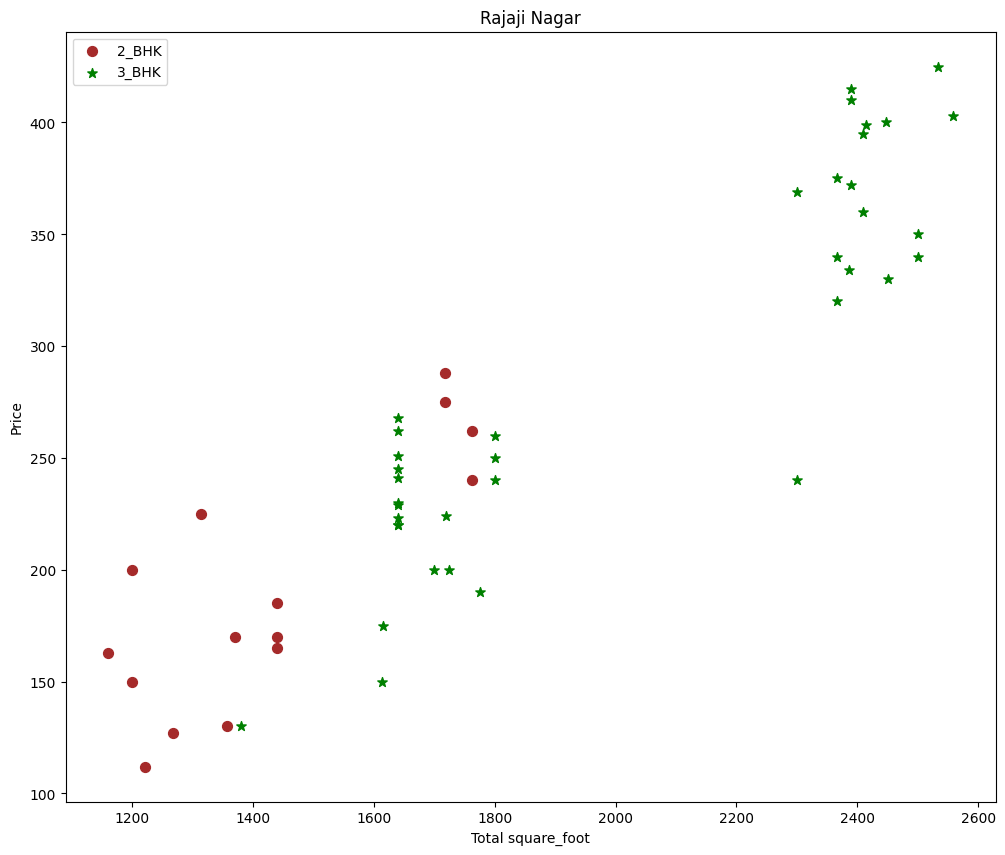

In [75]:
scatter_plot(df5,"Rajaji Nagar")

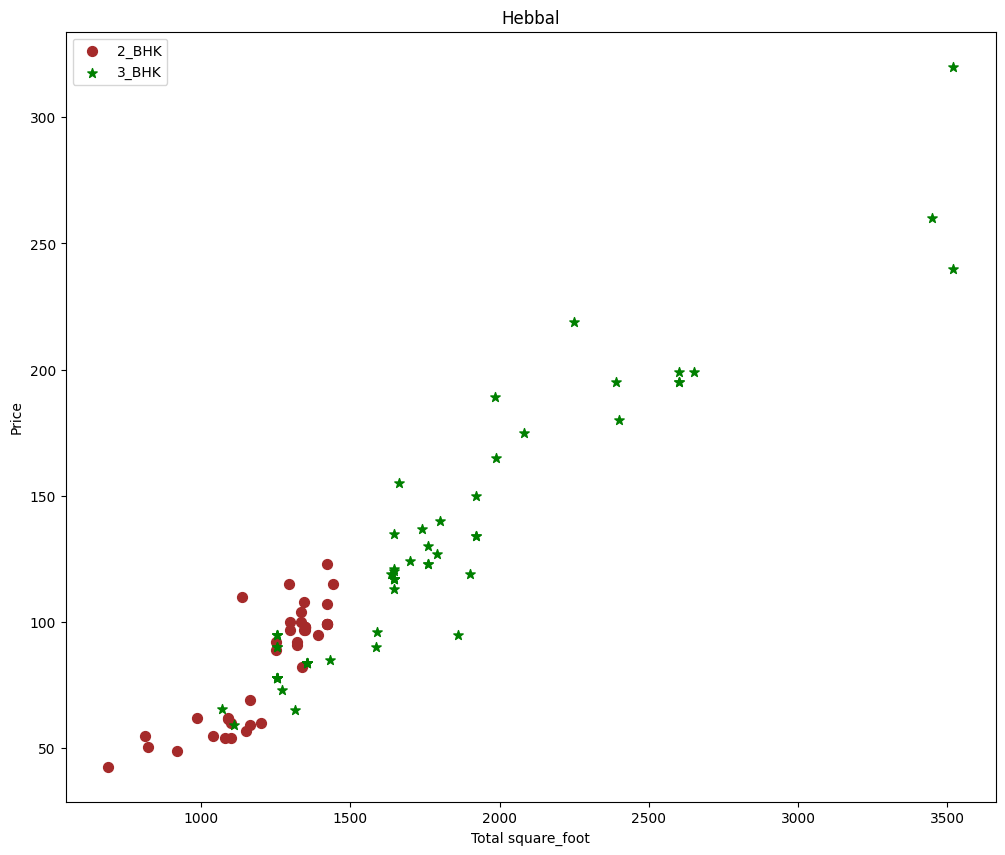

In [76]:
scatter_plot(df5,"Hebbal")

In [80]:
def bhk_outliers(df):
    exclude_indicies = np.array([])
    for location ,location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean' : np.mean(bhk_df.price_per_sq),
                'std' : np.std(bhk_df.price_per_sq),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indicies = np.append(exclude_indicies,bhk_df[bhk_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indicies,axis='index')

In [81]:
df6 = bhk_outliers(df5)

In [82]:
df6.shape

(7150, 9)

In [83]:
df5.shape

(10018, 9)

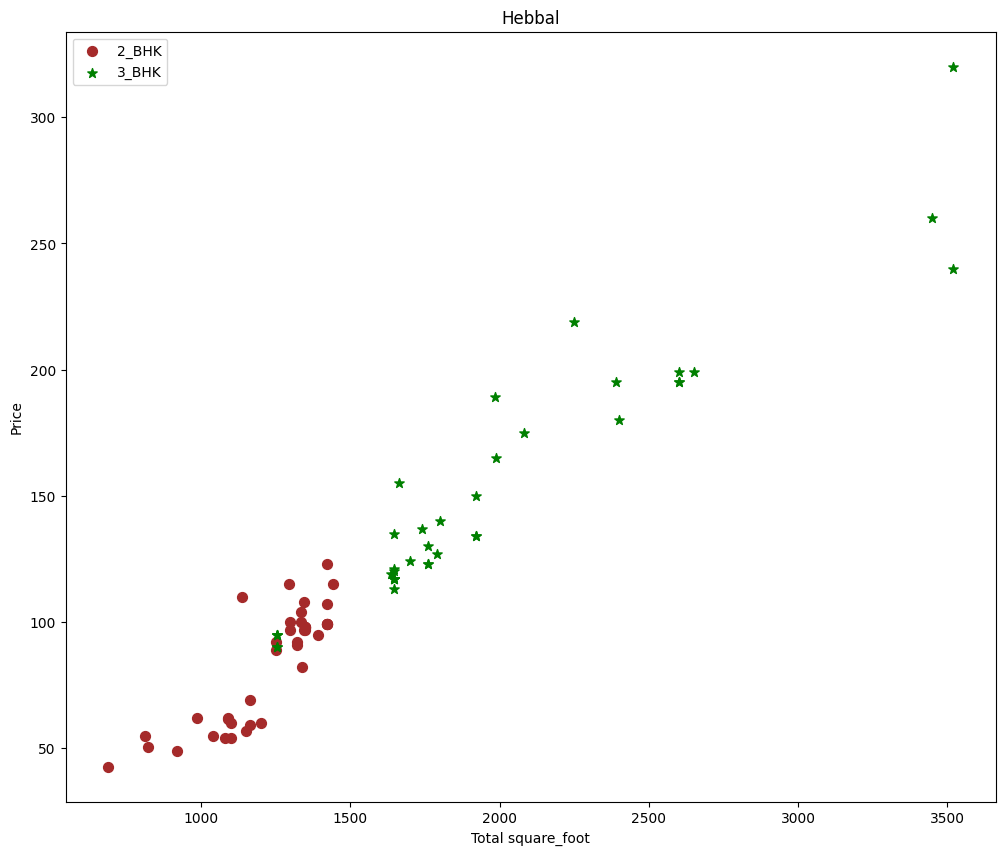

In [84]:
scatter_plot(df6,"Hebbal")

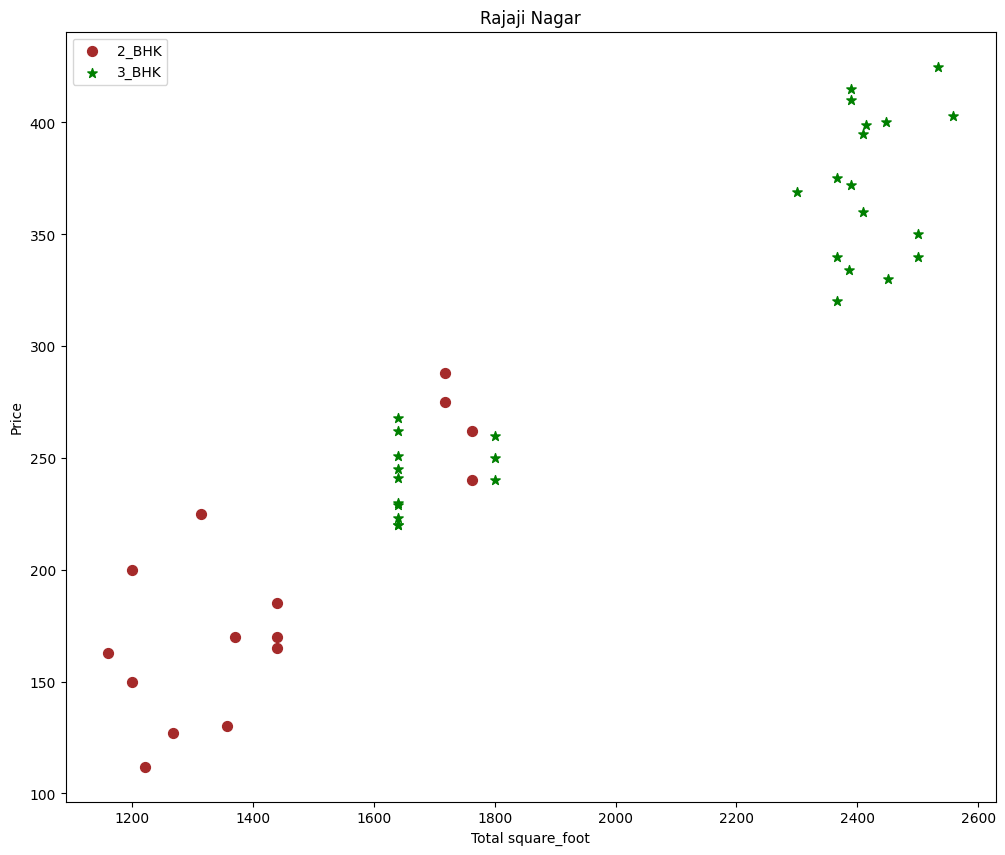

In [85]:
scatter_plot(df6,"Rajaji Nagar")

Text(0, 0.5, 'count')

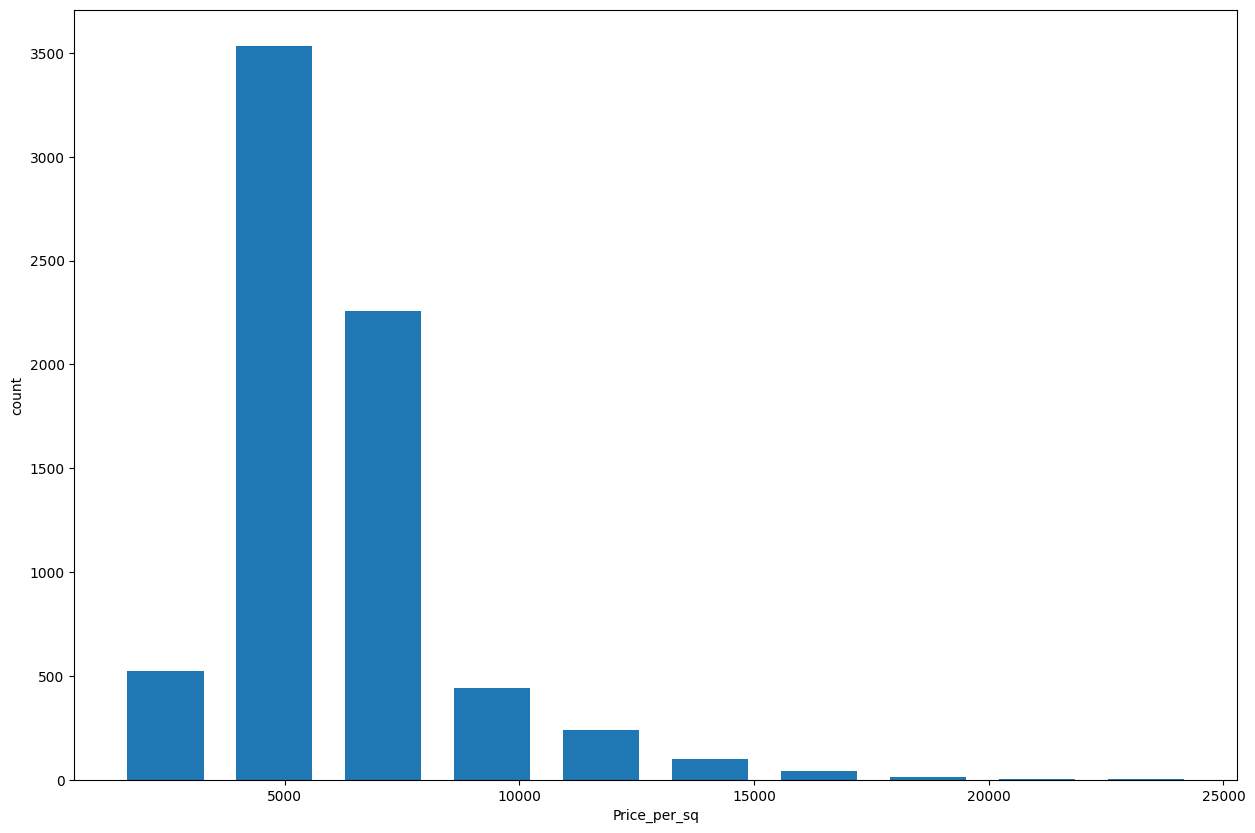

In [86]:
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df6.price_per_sq,rwidth=0.7)
plt.xlabel("Price_per_sq")
plt.ylabel("count")

In [88]:
df6[df6.bath>df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
1565,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4.0,3252.032520
5099,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4.0,6428.571429
6562,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3.0,6423.034330
8229,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6.0,8819.897689


In [89]:
len(df6[df6.bath>df6.bhk+2])

4

Text(0, 0.5, 'count')

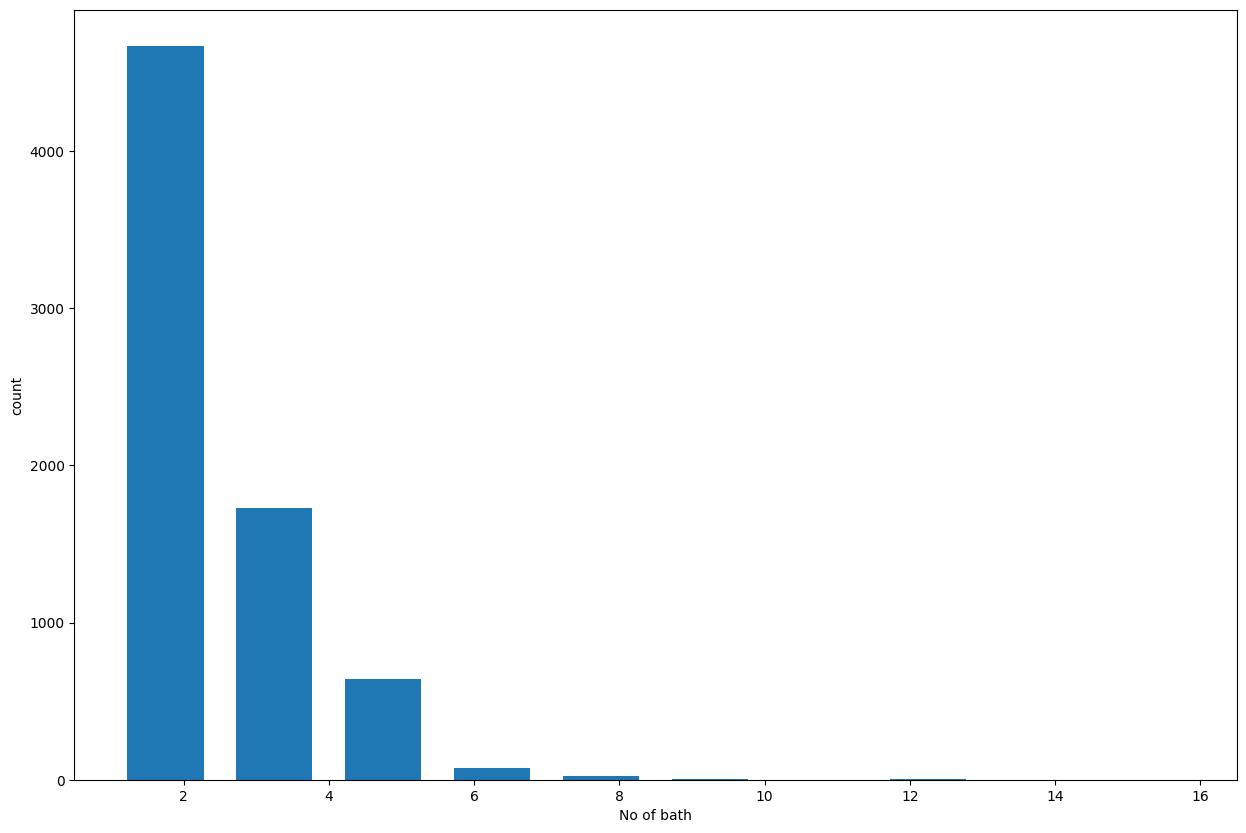

In [90]:
matplotlib.rcParams["figure.figsize"] = (15,10)
plt.hist(df6.bath,rwidth=0.7)
plt.xlabel("No of bath")
plt.ylabel("count")

In [91]:
df7 = df6[~(df6.bath>df6.bhk+2)]

In [92]:
df6.shape

(7150, 9)

In [93]:
df7.shape

(7146, 9)

In [95]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2.0,11983.805668


In [96]:
df8 = df7.drop(['size','price_per_sq'],axis=1)

# Model Building

In [97]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0


In [98]:
df8.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [100]:
len(df8['area_type'].unique())

4

In [101]:
len(df8['location'].unique())


241

In [102]:
df8.shape

(7146, 7)

In [108]:
dummies_df = pd.get_dummies(df8,drop_first=True,dtype=int)

In [109]:
dummies_df.shape

(7146, 248)

In [110]:
df9 = dummies_df.copy()

In [111]:
df9.shape

(7146, 248)

In [112]:
df9.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [115]:
X = df9.drop('price',axis=1)

In [116]:
X.shape

(7146, 247)

In [117]:
y = df9['price']

In [118]:
y.shape

(7146,)

In [193]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [194]:
linear_regression = LinearRegression()

In [195]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [196]:
linear_regression.score(X_test,y_test)

0.8437195392265039

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

In [125]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.5917778 ,  1.57600923, -0.7265398 , ..., -0.03347779,
        -0.0721434 , -0.42997457],
       [ 0.1585409 ,  0.56622155,  0.55287208, ..., -0.03347779,
        -0.0721434 , -0.42997457],
       [ 0.44636306, -0.44356612,  1.83228397, ..., -0.03347779,
        -0.0721434 , -0.42997457],
       ...,
       [-0.16687437, -0.44356612,  0.55287208, ..., -0.03347779,
        -0.0721434 ,  2.32571894],
       [-0.80243269, -1.4533538 , -2.00595169, ..., -0.03347779,
        -0.0721434 ,  2.32571894],
       [ 2.47286605,  2.58579691,  0.55287208, ..., -0.03347779,
        -0.0721434 ,  2.32571894]])

In [129]:
X_train_s,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=9)

In [130]:
linear_regression.fit(X_train_s,y_train)

LinearRegression()

In [131]:
linear_regression.score(X_test,y_test)

0.8133261188768823

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [160]:
cv = ShuffleSplit(n_splits=500,test_size=0.2,random_state=9)

In [161]:
cs =cross_val_score(linear_regression,X,y,cv=cv)

In [162]:
cs.mean()

np.float64(0.8404322537744349)

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [183]:
def best_model(X,y):
    
    algo = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=9)

    
    for algo_name, config in algo.items():
        Gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        Gs.fit(X, y)
        
        
        scores.append({
            'model': algo_name,
            'best_score': Gs.best_score_,
            'best_params': Gs.best_params_
        })

    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [184]:
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.839714,{}
1,lasso,0.709035,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.729103,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [197]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=247)

In [206]:
def prediction(location, sqft, bath, bhk, balcony):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))  # Create a zero array of the same length as X's columns
    x[0] = sqft  # Set sqft
    x[1] = bath  # Set bath
    x[2] = balcony  # Set balcony
    x[3] = bhk  # Set bhk

    # If location index is valid, set that index to 1 in the feature array
    if loc_index >= 0:
        x[loc_index] = 1
    
    # Return the prediction using the correctly formed array x
    return linear_regression.predict([x])[0]  # Use x instead of [X]


In [221]:
prediction('location_1st Phase JP Nagar',1000,3,2,3)

/Users/omkar/jupyter_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(89.98137613152446)

## so lets remove the balcony column and check

In [222]:
X_r_b = df9.drop(['balcony','price'],axis=1)

In [223]:
y_r_b = df9['price']

In [224]:
X_train,X_test ,y_train,y_test = train_test_split(X_r_b,y_r_b,test_size=0.2,random_state=7)

In [225]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [226]:
linear_regression.score(X_test,y_test)

0.8437497167388724

In [228]:
X_r_b.columns

Index(['total_sqft', 'bath', 'bhk', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=246)

In [237]:
def prediction(location, sqft, bath, bhk):
    loc_index = np.where(X_r_b.columns == location)[0][0]
    x = np.zeros(len(X_r_b.columns))  # Create a zero array of the same length as X's columns
    x[0] = sqft  # Set sqft
    x[1] = bath  # Set bath
    x[2] = bhk  # Set bhk

    # If location index is valid, set that index to 1 in the feature array
    if loc_index >= 0:
        x[loc_index] = 1
    
    # Return the prediction using the correctly formed array x
    return linear_regression.predict([x])[0]  # Use x instead of [X]


In [240]:
predict_price('location_1st Phase JP Nagar',1000,3,3)

/Users/omkar/jupyter_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.89588919244949)

# We are using this model where balcony is removed

In [241]:
predict_price('location_Indira Nagar',1000,3,3)

/Users/omkar/jupyter_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(175.81313103044653)

# i think we also dont need the area type column 

In [244]:
df9.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
print(df9.columns.tolist())



['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area', 'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_AECS Layout', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere', 'location_Attibele', 'location_BEML Layout', 'location_BTM 2nd Stage', 'location_BTM Layout', 'location_Babusapalaya', 'location_Badavala Nagar', 'location_Balagere', 'location_Banashankari', 'location_Banashankari Stage II', 'location_Banashankari Stage III', 'location_Banashankari Stage V', 'loc

In [246]:
df9.columns = df9.columns.str.strip()

In [249]:
df10 = df9.drop(['area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area', 'balcony'], axis=1)

In [250]:
df10.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
X  = df10.drop('price',axis=True)

In [252]:
y = df10['price']

In [253]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [254]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [255]:
linear_regression.score(X_test,y_test)

0.811620442892353

In [262]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=243)

In [260]:
def prediction(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))  # Create a zero array of the same length as X's columns
    x[0] = sqft  # Set sqft
    x[1] = bath  # Set bath
    x[2] = bhk  # Set bhk

    # If location index is valid, set that index to 1 in the feature array
    if loc_index >= 0:
        x[loc_index] = 1
    
    # Return the prediction using the correctly formed array x
    return linear_regression.predict([x])[0]  # Use x instead of [X]
   

In [280]:

predict_price('location_Indira Nagar',1000,2,2)

/Users/omkar/jupyter_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(172.50530200888238)

In [281]:
import json


columns = {
    'data_columns': [col.lower().replace('location_', '') for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))


In [282]:
import pickle

with open('house_prediction_banglore.pickle','wb') as f:
    pickle.dump(linear_regression,f)